**INSTANCIA EVALUATIVA II DE CIENCIA DE DATOS**
 
ISPC - COHORTE 2020

Prof. Narciso Perez

Trabajo Práctico sobre K-Means:

Grupo de estudio conformado por:

  - Giovine, Carina;
  - Herrero Rivero, Eduardo;
  - Arévalo, Iván;
  - Gómez, Octavio.
    



## El algoritmo k-means:

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

El algoritmo consta de tres pasos:

- Inicialización: una vez escogido el número de grupos, $k$, se establecen $k$ centroides en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente.

- Asignación objetos a los centroides: cada objeto de los datos es asignado a su centroide más cercano.

- Actualización de centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.

Se repiten los pasos 2 y 3 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada paso.

El algoritmo k-means resuelve un problema de optimización, siendo la función a optimizar (minimizar) la suma de las distancias cuadráticas de cada objeto al centroide de su cluster, tambien conocida como $inercia$:

$$  inercia = \displaystyle\sum_{i=1}^{k} \parallel X_{j} - μ_{i} \parallel ^2 $$

Los objetos se representan con vectores reales de $d$
dimensiones $(X_{1},X_{2},…,X_{n})$ y el algoritmo k-means construye $k$ grupos donde se minimiza la suma de distancias de los objetos, dentro de cada grupo $S = \left\lbrace S_{1},S_{2},…,S_{k}\right\rbrace $, a su centroide. El problema se puede formular de la siguiente forma:

$$ \min_{S} E(μ_{i}) = \displaystyle\sum_{i=1}^{k} \displaystyle\sum_{X_{j}\in S_{i}} \parallel X_{j} - μ_{i} \parallel ^2  (1)$$ 

donde $S$ es el conjunto de datos cuyos elementos son los objetos X_{j} representados por vectores, donde cada uno de sus elementos representa una característica o atributo. Tendremos $k$ grupos o clusters con su correspondiente centroide $μ_{i}$.

En cada actualización de los centroides, desde el punto de vista matemático, imponemos la condición necesaria de extremo a la función $E(μi)$ que, para la función cuadrática $(1)$ es:


$$ \frac{\partial E}{\partial\boldsymbol{\mu}_{i}}=0\;\Longrightarrow\;\boldsymbol{\mu}_{i}^{(t+1)}=\frac{1}{\left|S_{i}^{(t)}\right|}\sum_{\mathbf{x}_{j}\in S_{i}^{(t)}}\mathbf{x}_{j} $$



y se toma el promedio de los elementos de cada grupo como nuevo centroide.

Las principales ventajas del método k-means son que es un método sencillo y rápido. Pero es necesario decidir el valor de $k$ y el resultado final depende de la inicialización de los centroides. En principio no converge al mínimo global sino a un mínimo local.

## Ejemplo en python de segmentación de clientes de un banco, tomando el saldo de su cuenta y cuantas veces utilizó la tarjeta de débito asociada a dicha cuenta:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creamnos un dataframe con el saldo de algunas cuentas bancarias y el nro de 
# operaciones con la tarjeta de débito asociada a cada una de esas cuentas:
cltes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000, 
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000,
                                    36000, 34500, 31800, 55000, 33200, 56700,
                                    9000, 19600, 10100,5950, 24000,16500],
                         
                         "transacciones": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18,
                                           8, 3, 6, 4, 9, 23,
                                           20, 11, 7, 18, 20, 17,
                                           19,16,15,21,14,13]})


# KMeans se ve afectado cuando los datos están en escalas diferentes, por lo que
# normalizaremos todos los valores del dataframe a una escala de 0 a 1 y asi evitamos
# introducir un sesgo. De esta forma, conservamos la información, teniendo todos 
# los datos en una misma escala:
scaler = MinMaxScaler().fit(cltes.values)

clientes = pd.DataFrame(scaler.transform(cltes.values),
                       columns=["saldo", "transacciones"])

In [3]:
# Vemos como quedó el dataframe luego del escalado:
print("Así queda el dataframe despues de pasar por el escalador:\n ")
print(clientes)

Así queda el dataframe despues de pasar por el escalador:
 
       saldo  transacciones
0   0.867980       0.916667
1   0.769458       0.708333
2   0.828571       0.541667
3   0.739901       0.833333
4   0.808867       0.916667
5   0.907389       0.625000
6   0.276847       0.833333
7   0.395074       0.791667
8   0.375369       0.875000
9   0.335961       0.750000
10  0.304433       1.000000
11  0.237438       0.625000
12  0.040394       0.208333
13  0.119212       0.000000
14  0.000985       0.125000
15  0.168473       0.041667
16  0.131034       0.250000
17  0.020690       0.833333
18  0.592118       0.708333
19  0.562562       0.333333
20  0.509360       0.166667
21  0.966502       0.625000
22  0.536946       0.708333
23  1.000000       0.583333
24  0.060099       0.666667
25  0.268966       0.541667
26  0.081773       0.500000
27  0.000000       0.750000
28  0.355665       0.458333
29  0.207882       0.416667


In [24]:
# Generamos el modelo y especificando clusters e iteraciones:
n = 8  # Cantidad de clusters.
i = 100 # Cantidad de iteraciones.
kmeans = KMeans(n_clusters=n, n_init=i).fit(clientes)

In [25]:
# Agregamos al dataframe "clientes" una nueva columna con las etiquetas
# que KMeans asignó a cada cluster:
clientes["cluster"] = kmeans.labels_

# Mostramos las etiquetas:
print ("Este es un array con las etiquetas de los clusters:\n ", kmeans.labels_)

Este es un array con las etiquetas de los clusters:
  [5 5 4 5 5 4 0 0 0 0 0 2 3 7 3 7 3 6 1 3 3 4 1 4 6 2 2 6 2 2]


In [26]:
# Vemos como quedo el dataframe:
print(clientes)

       saldo  transacciones  cluster
0   0.867980       0.916667        5
1   0.769458       0.708333        5
2   0.828571       0.541667        4
3   0.739901       0.833333        5
4   0.808867       0.916667        5
5   0.907389       0.625000        4
6   0.276847       0.833333        0
7   0.395074       0.791667        0
8   0.375369       0.875000        0
9   0.335961       0.750000        0
10  0.304433       1.000000        0
11  0.237438       0.625000        2
12  0.040394       0.208333        3
13  0.119212       0.000000        7
14  0.000985       0.125000        3
15  0.168473       0.041667        7
16  0.131034       0.250000        3
17  0.020690       0.833333        6
18  0.592118       0.708333        1
19  0.562562       0.333333        3
20  0.509360       0.166667        3
21  0.966502       0.625000        4
22  0.536946       0.708333        1
23  1.000000       0.583333        4
24  0.060099       0.666667        6
25  0.268966       0.541667        2
2

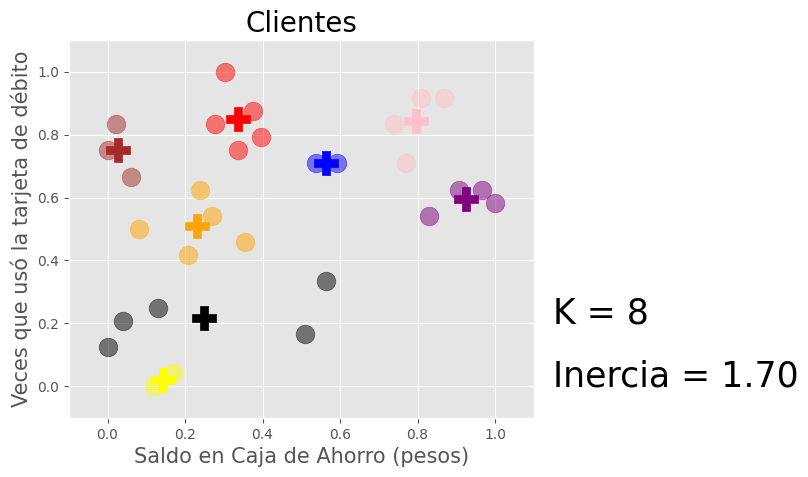

In [27]:
# Graficamos como queda nuestra agrupación y vemos el nro de clusters y
# el valor de la "Inercia", este último valor nos da una idea de que tan
# cercanos son los valores al centroide:
n_clusters = n
plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown", "yellow"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en Caja de Ahorro (pesos)", fontsize=15)
plt.ylabel("Veces que usó la tarjeta de débito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

# Eliminamos la columna "cluster" del dataframe:
del clientes["cluster"] 

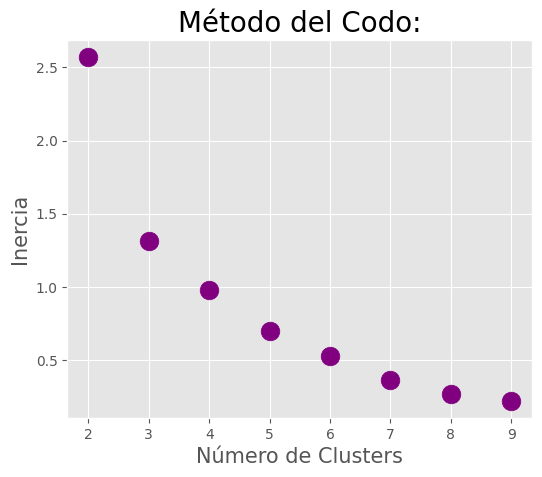

In [13]:
# Estimación del número de Clusters (K) segun el Método del Codo:
range_n_clusters = range(2, 10)
inercias = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init=i).fit(clientes)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.title("Método del Codo:", fontsize=20)
plt.xlabel("Número de Clusters", fontsize=15)
plt.ylabel("Inercia", fontsize=15)
plt.show()


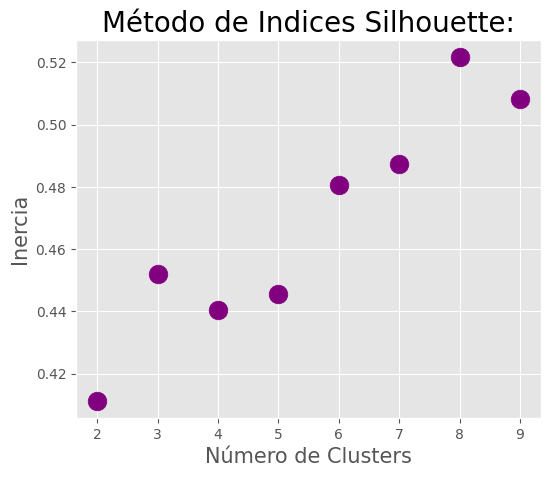

In [14]:
# Estimación del número de Clusters (K) segun el Método de Indices Silhouette:
range_n_clusters = range(2, 10)
val_m_silhouette = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=50).fit(clientes) 
    cluster_labels = kmeans.fit_predict(clientes)
    silhouette_avg = silhouette_score(clientes, cluster_labels)
    val_m_silhouette.append(silhouette_avg)
    
plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), val_m_silhouette, marker="o", s=180, color="purple")
plt.title("Método de Indices Silhouette:", fontsize=20)
plt.xlabel("Número de Clusters", fontsize=15)
plt.ylabel("Inercia", fontsize=15)
plt.show()

AHORA VEREMOS UN EJEMPLO DE CODIGO EN R:

In [15]:
# Con esta sentencia, Colab nos permite correr código en R mientras se anteponga
# en cada celda "%%R":
%load_ext rpy2.ipython

In [16]:
# Instalamos y cargamos las librerias necesarias (esto lleva hasta 6 minutos):
%%R
install.packages("tidyverse")
install.packages("ggpubr")

library(tidyverse)
library(ggpubr)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 702779 bytes (686 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [19]:
# Se simulan datos aleatorios con dos dimensiones:
%%R
set.seed(101)
datos <- matrix(rnorm(n = 100*2), nrow = 100, ncol = 2,
                dimnames = list(NULL,c("x", "y")))
datos <- as.data.frame(datos)

In [20]:
# Podemos explorar los datos:
%%R
str(datos)
head(datos)

'data.frame':	100 obs. of  2 variables:
 $ x: num  -0.326 0.552 -0.675 0.214 0.311 ...
 $ y: num  0.268 -0.592 2.133 1.173 0.747 ...
           x          y
1 -0.3260365  0.2680658
2  0.5524619 -0.5922083
3 -0.6749438  2.1334864
4  0.2143595  1.1727487
5  0.3107692  0.7467610
6  1.1739663 -0.2305087


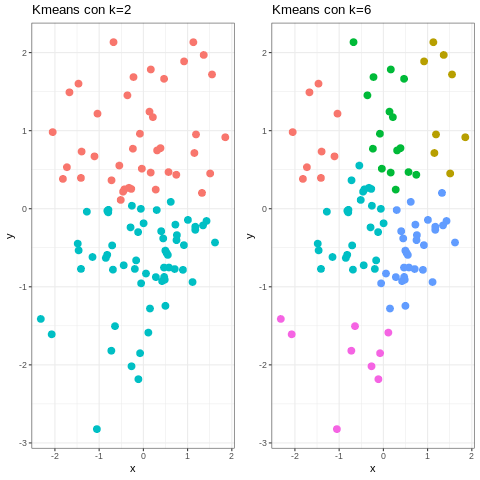

In [21]:
%%R
# Generamos 2 ejemplos, agrupando en 2 y en 6 clusters:
# Resultados para K = 2
datos <- datos %>% select(x, y)
set.seed(101)
km_clusters_2 <- kmeans(x = datos, centers = 2, nstart = 50)
datos <- datos %>% mutate(cluster = km_clusters_2$cluster)
p1 <- ggplot(data = datos, aes(x = x, y = y, color = as.factor(cluster))) +
      geom_point(size = 3) +
      labs(title = "Kmeans con k=2") +
      theme_bw() +
      theme(legend.position = "none")


# Resultados para K = 6
datos <- datos %>% select(x, y)
set.seed(101)
km_clusters_6 <- kmeans(x = datos, centers = 6, nstart = 50)
datos <- datos %>% mutate(cluster = km_clusters_6$cluster)
p2 <- ggplot(data = datos, aes(x = x, y = y, color = as.factor(cluster))) +
      geom_point(size = 3) +
      labs(title = "Kmeans con k=6") +
      theme_bw() +
      theme(legend.position = "none")

ggarrange(p1, p2)

Otros algoritmos comparables para clustering:

- K-medoids
- Hierarchical clustering
- Aglomerativo
- DIANA (DIvisive ANAlysis Clustering)
- Dendrograma
- Density based clustering (DBSCAN)
- Gaussian mixture models (GMMs)

Limitaciones del clustering


El clustering puede ser una herramienta muy útil para encontrar agrupaciones en los datos, sobre todo a medida que el volumen de los mismos aumenta. Sin embargo, es importante recordar sus limitaciones o los problemas que pueden surgir al aplicarlo. Algunas de ellos son:

- Pequeñas decisiones pueden tener grandes consecuencias: a la hora de utilizar los métodos de clustering, se tienen que tomar decisiones que influyen en gran medida en los resultados obtenidos. No existe una única respuesta correcta, por lo que en la práctica se prueban diferentes opciones.

- Escalado y centrado de las variables.

- Qué medida de distancia/similitud emplear.

- Número de clusters.

- Tipo de linkage empleado en hierarchical clustering.

- A que altura establecer el corte de un dendrograma.

- Validación de los clusters obtenidos: no es fácil comprobar la validez de los resultados ya que en la mayoría de escenarios se desconoce la verdadera agrupación.

- Falta de robustez: los métodos de K-means-clustering e hierarchical clustering asignan obligatoriamente cada observación a un grupo. Si existe en la muestra algún outlier, a pesar de que realmente no pertenezca a ningún grupo, el algoritmo lo asignará a uno de ellos provocando una distorsión significativa del cluster en cuestión. Algunas alternativas son k-medoids y DBSCAN.

- La naturaleza del algoritmo de hierarchical clustering conlleva que, si se realiza una mala división en los pasos iniciales, no se pueda corregir en los pasos siguientes. 



